['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']
Epoch 1/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6316 - accuracy: 0.6982 - val_loss: 0.5519 - val_accuracy: 0.8100
Epoch 2/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4574 - accuracy: 0.8414 - val_loss: 0.4338 - val_accuracy: 0.8200
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3579 - accuracy: 0.8796 - val_loss: 0.4295 - val_accuracy: 0.8250
Epoch 4/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.3066 - accuracy: 0.8980 - val_loss: 0.3583 - val_accuracy: 0.8800
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2713 - accuracy: 0.9082 - val_loss: 0.3637 - val_accuracy: 0.8550
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.2476 - accuracy: 0.9166 - val_loss: 0.3051 - val_accuracy:

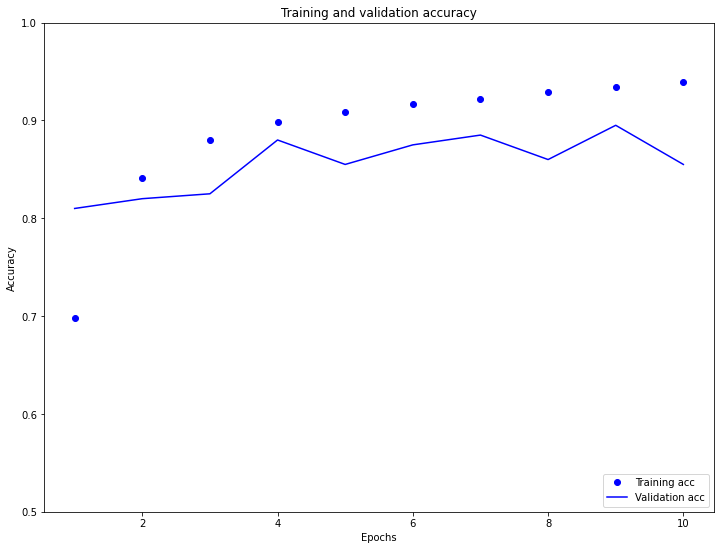

In [25]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', 
                                          split=(tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info=True, as_supervised=True)

encoder = info.features['text'].encoder
print(encoder.subwords[:20])

padded_shapes =([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)


embedding_dim = 16
model = keras.Sequential([
    layers.Embedding(encoder.vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=20)

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()



In [ ]:
# embedding_layer = layers.Embedding(1000, 5)
# result = embedding_layer(tf.constant([1,2,3]))

# print(result.numpy().shape)

In [10]:
# (train_data, test_data), info = tfds.load('IMDB/subworks8k', split=(tfds.Split.TRAIN, tfds.Split.TEST), with_info=True, as_supervised=True)

NameError: name 'tfds' is not defined